In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.isnull().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

In [ ]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print("In {}, mean of null value is : {}".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

In [ ]:
df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
df.columns = ['Sex','Length','Diameter','Height','Whole Weight','Shuckled Weight','Viscera Weight','Shell Weight','Rings']

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shuckled Weight,Viscera Weight,Shell Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])

In [ ]:
X = df.iloc[:,0:-1]
y = df['Rings']

In [ ]:
X.head()

,Sex,Length,Diameter,Height,Whole Weight,Shuckled Weight,Viscera Weight,Shell Weight
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [ ]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [ ]:
samples

[(      Sex  Length  Diameter  Height  Whole Weight  Shuckled Weight  \
  3384    0   0.475     0.350   0.115        0.4870           0.1940   
  1923    0   0.610     0.460   0.155        0.9570           0.4255   
  1666    0   0.605     0.505   0.180        1.4340           0.7285   
  1122    0   0.550     0.415   0.135        0.8145           0.4270   
  880     2   0.655     0.520   0.165        1.4095           0.5860   
  ...   ...     ...       ...     ...           ...              ...   
  1033    0   0.655     0.460   0.160        1.4940           0.6895   
  3264    2   0.480     0.380   0.135        0.5280           0.2000   
  1653    1   0.595     0.460   0.150        0.8335           0.3770   
  2607    0   0.625     0.490   0.175        1.1075           0.4485   
  2732    1   0.415     0.335   0.100        0.3580           0.1690   
  
        Viscera Weight  Shell Weight  
  3384          0.1455        0.1250  
  1923          0.1975        0.2650  
  1666          

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [ ]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)
     

In [ ]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.26 Best Kernel =  rbf Best Nu =  9.29 Best Epsilon =  8.41
Best Accuracy =  0.28 Best Kernel =  rbf Best Nu =  8.94 Best Epsilon =  3.67
Best Accuracy =  0.27 Best Kernel =  rbf Best Nu =  7.19 Best Epsilon =  1.47
Best Accuracy =  0.27 Best Kernel =  rbf Best Nu =  9.98 Best Epsilon =  4.0
Best Accuracy =  0.27 Best Kernel =  rbf Best Nu =  5.35 Best Epsilon =  5.27
Best Accuracy =  0.27 Best Kernel =  rbf Best Nu =  6.52 Best Epsilon =  9.33
Best Accuracy =  0.27 Best Kernel =  linear Best Nu =  2.06 Best Epsilon =  2.63
Best Accuracy =  0.26 Best Kernel =  rbf Best Nu =  2.75 Best Epsilon =  4.6
Best Accuracy =  0.26 Best Kernel =  linear Best Nu =  2.1 Best Epsilon =  1.41
Best Accuracy =  0.26 Best Kernel =  rbf Best Nu =  9.83 Best Epsilon =  6.0



# Final Result

In [ ]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.26,rbf,9.29,8.41
1,2,0.28,rbf,8.94,3.67
2,3,0.27,rbf,7.19,1.47
3,4,0.27,rbf,9.98,4.00
4,5,0.27,rbf,5.35,5.27
5,6,0.27,rbf,6.52,9.33
6,7,0.27,linear,2.06,2.63
7,8,0.26,rbf,2.75,4.60
8,9,0.26,linear,2.10,1.41
9,10,0.26,rbf,9.83,6.00


In [ ]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
     

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)     

# Convergence Graph

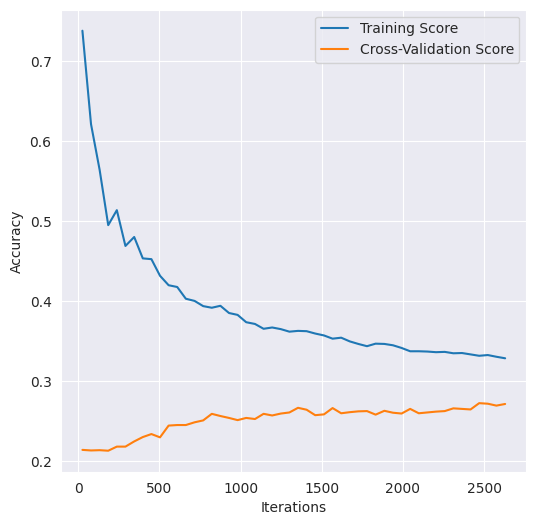

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()